In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 

In [4]:
conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "dmart_store"
)
print("data connected successfully!")

data connected successfully!


In [7]:
query = "SELECT * FROM dmart_sales"
df = pd.read_sql(query, conn)
df.head(1)

C:\Users\SUD2\AppData\Local\Temp\ipykernel_19384\1294066930.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,OrderID,CustomerName,Category,SubCategory,City,OrderDate,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,None,North,1254.0,0.12,401.28,Tamil Nadu


In [9]:
cart_summary = df.groupby("Category").agg({"Sales" : "sum", "Profit" : "sum"}).sort_values("Sales", ascending = False)
cart_summary.head(5)

,Sales,Profit
Category,,
"Eggs, Meat & Fish",2267401.0,567357.22
Snacks,2237546.0,568178.85
Food Grains,2115272.0,529162.64
Bakery,2112281.0,528521.06
Fruits & Veggies,2100727.0,530400.38


In [12]:
df['Percentage_Profit'] = (df['Profit'] / df['Sales']) * 100
df.head()

,OrderID,CustomerName,Category,SubCategory,City,OrderDate,Region,Sales,Discount,Profit,State,Percentage_Profit
0,OD1,Harish,Oil & Masala,Masalas,Vellore,None,North,1254.0,0.12,401.28,Tamil Nadu,32.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,None,South,749.0,0.18,149.80,Tamil Nadu,20.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,None,West,2360.0,0.21,165.20,Tamil Nadu,7.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,None,South,896.0,0.25,89.60,Tamil Nadu,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,None,South,2355.0,0.26,918.45,Tamil Nadu,39.0


In [15]:
region_sales_profit = df.groupby("Region").agg({"Sales" : "sum", "Profit" : "sum"}).sort_values("Profit", ascending = False)
region_sales_profit

,Sales,Profit
Region,,
West,4798743.0,1192004.61
East,4248368.0,1074345.58
Central,3468156.0,856806.84
South,2440461.0,623562.89
North,1254.0,401.28


Total Sales: 14956982.0
Total Profit: 3747121.1999999997
Average Discount: 0.22681709025415253
                       Sales     Profit  Discount
Category                                         
Eggs, Meat & Fish  2267401.0  567357.22  0.227792
Snacks             2237546.0  568178.85  0.222048
Food Grains        2115272.0  529162.64  0.228548
Bakery             2112281.0  528521.06  0.225428
Fruits & Veggies   2100727.0  530400.38  0.229295
             Sales      Profit
Region                        
West     4798743.0  1192004.61
East     4248368.0  1074345.58
Central  3468156.0   856806.84
South    2440461.0   623562.89
North       1254.0      401.28


<Figure size 800x500 with 0 Axes>

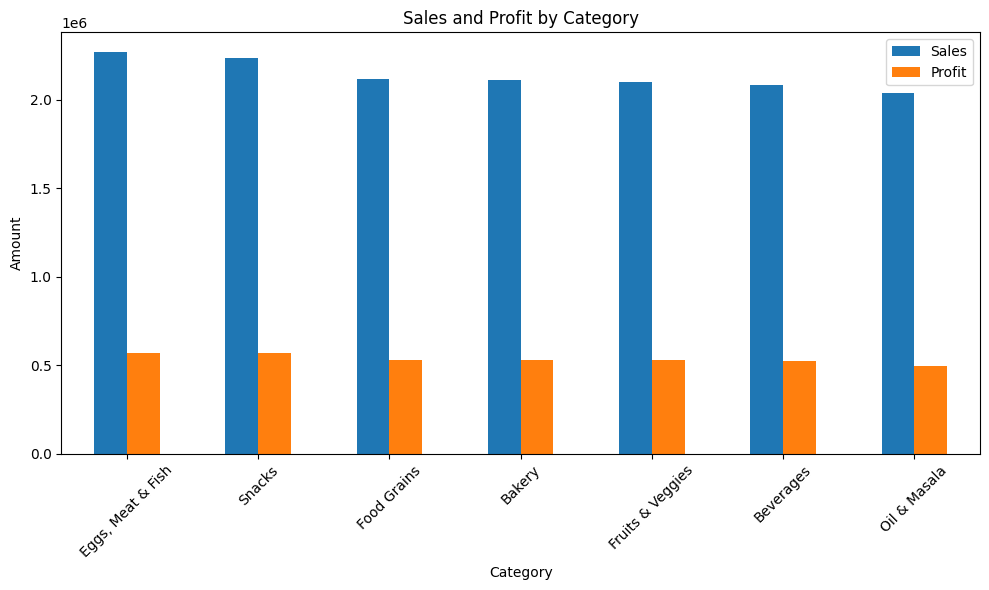

In [17]:
# Overall KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()

print('Total Sales:', total_sales)
print('Total Profit:', total_profit)
print('Average Discount:', avg_discount)

# Category level summary
cat_summary = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum', 'Discount':'mean'}).sort_values('Sales', ascending=False)
print(cat_summary.head())

# Region performance
region_summary = df.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'}).sort_values('Sales', ascending=False)
print(region_summary)

# Visualization: Sales vs Profit by Category
plt.figure(figsize=(8,5))
cat_summary[['Sales','Profit']].plot(kind='bar', figsize=(10,6))
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

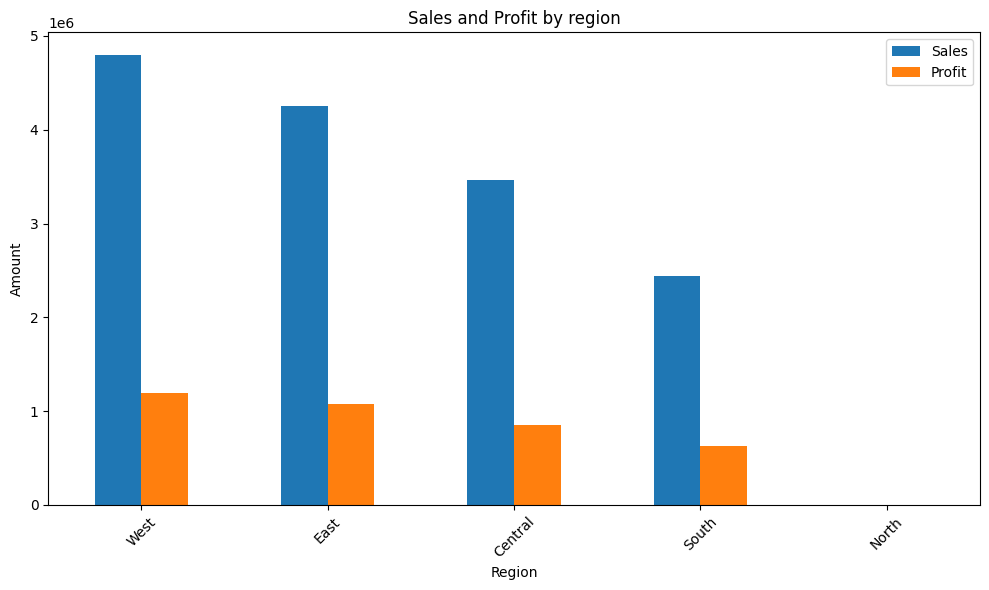

In [18]:
# Visualization: Sales vs Profit by region
plt.figure(figsize=(8,5))
region_summary[['Sales','Profit']].plot(kind='bar', figsize=(10,6))
plt.title('Sales and Profit by region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()